In [1]:
################################################################################################
# Diabetes Feature Engineering Project
################################################################################################

# 1. Introduction:

# Project Scope: A medical supplier company needs to predict whether a person has diabetes using ML. However,
# before trying out the ML algorithms, we need to perform an EXPLORATORY DATA ANALYSIS and  FEATURE ENGINEERING.

# Story of The Data: The dataset is derived from  'USA national institute of diabetes and digestive and kidney diseases'
# dataset. The target variable is identified as 0 and 1 where 0 refers to negative diabetes test result and 1 refers to
# positive diabetes test result.

# 9 feature, 768 observations, 24 KB.

# 2. Exploratory Data Analysis:


In [2]:
# loading the libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#!pip install missingno
import missingno as msno
from datetime import date
#!pip install tensorflow
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# loading the diabetes dataset.
data = pd.read_csv("diabetes.csv")
df = data.copy()


In [4]:
# 3 ten fazla hamilelik sayısı olan kadınların yaş ortalaması
df[df["Pregnancies"] > 3]["Age"].value_counts()

41    18
37    17
42    14
31    14
28    14
45    13
29    13
43    12
38    12
30    11
34    11
36    11
32    10
33    10
39    10
40    10
46     9
27     9
51     8
26     7
24     7
50     7
35     7
58     6
48     5
25     5
44     5
49     5
22     5
47     5
54     5
57     5
60     5
23     4
52     4
53     3
66     3
63     3
56     3
55     3
61     2
65     2
67     2
69     2
21     2
59     1
81     1
64     1
62     1
70     1
68     1
Name: Age, dtype: int64

In [5]:

# Quick glance at a dataset
def check_df(data, x=5):
    print('################################# shape ##########################')
    print(data.shape )
    print('################################# type ##########################')
    print(data.dtypes)
    print('################################# head ##########################')
    print(data.head(x))
    print('################################# tail ##########################')
    print(data.tail(x))
    print('################################# null ##########################')
    print(data.isnull().sum().sort_values(ascending=False))
    print('################################# quantiles #####################')
    print(data.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)
check_df(df)

# At the first sight, it seems that we have only integers and float values.
# NO NAN Values
# Pregnancy's max value falls far away from its mean or median values.
# Insulin's mean and median values are far away from each other.


################################# shape ##########################
(768, 9)
################################# type ##########################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
################################# head ##########################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1

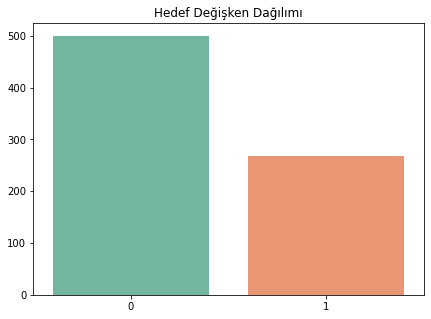

In [6]:
tanilar = df.Outcome.value_counts().index
sayilar = df.Outcome.value_counts().values

plt.figure(figsize=(7,5))
sns.set_palette("Set2")
sns.barplot(x=tanilar, y=sayilar)
plt.title("Hedef Değişken Dağılımı")
plt.xticks(rotation=0)
plt.show()

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


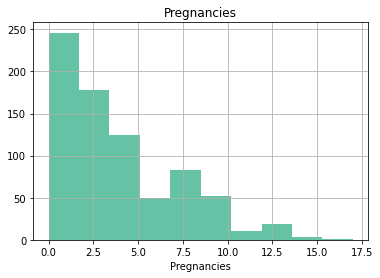

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


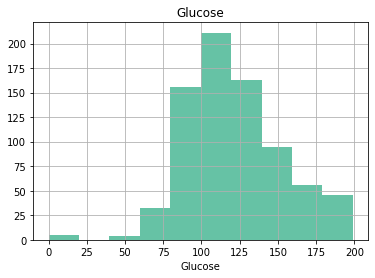

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


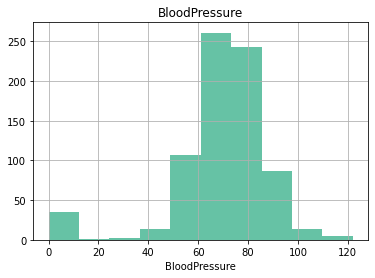

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


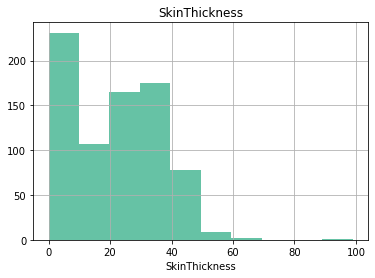

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


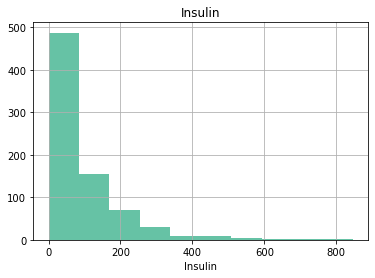

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


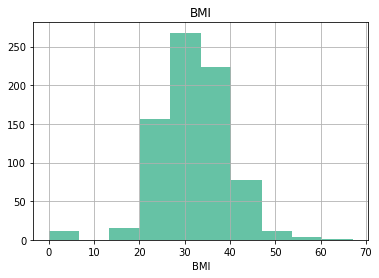

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


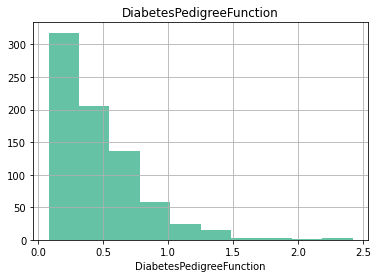

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


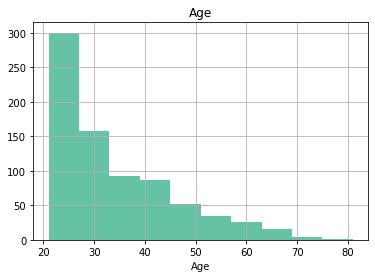

   Outcome  Ratio
0      500 65.104
1      268 34.896
##################### Outcome ############################


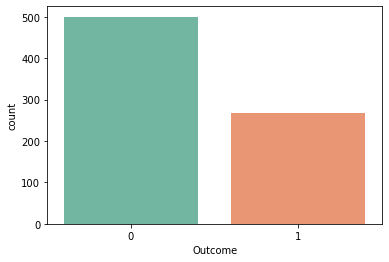

In [7]:

# Numerical and Categorical Variable analysis:

def grab_col_names (dataframe, categorical = 10, cardinal =20):

    # categoricals
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']
    #  [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype == 'O' and
                   dataframe[col].nunique() > cardinal]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtype != 'O' and
                   dataframe[col].nunique() < categorical]
    cat_cols += num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # numericals

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O' and
                col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names (df, categorical = 10, cardinal =20)

# The only categorical variable is our target variable 'Pregnancies' and the target var.
# Rest of the variables are numerical.
# There is no categorical variable with high cardinality.

# Numerical Variable Analysis
def num_summary(dataframe, numeric_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numeric_col].describe(quantiles).T)

    if plot:
        dataframe[numeric_col].hist()
        plt.xlabel(numeric_col)
        plt.title(numeric_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

# Results
# In this dataset, majority has following characteritics;
# 75-150 glucose levels
# 60- 85 blood pressure
# 0 - 40 skin tickness.
# 0-100 insulin levels
# 20-45 BMI
# 20-35 Age
# 0.0 - 0.5 Diabetes pedigree function.

# Categorical Variable Analysis
def cat_summary( dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio':100 * dataframe[col_name].value_counts()/len(dataframe)}))
    print('#####################',col_name,'############################')

    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

for col in cat_cols:
    cat_summary(df, col, plot = True)

# Results:
# In this dataset majority has following categorical characteristics:
# Number of pregnancies 0-5.
# Target variable / test result is negative(0).


In [8]:
########################## Target Summary #############################################
# Comparing Categorical Var. Values against the Target Var. Values
df.groupby('Pregnancies').agg({'Outcome': ['mean', 'sum']}).reset_index().\
    sort_values(by = ('Outcome','sum'),ascending = False)

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    
# Comparing Numerical Var. Values against the Target Var. Values
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: 'mean'}))

for col in num_cols:
    target_summary_with_num(df, 'Outcome', col)

# Until now, INSULIN levels and GLUCOSE levels has some
# distintive values. The mean difference for target variable in the other features
# are closer.


         Pregnancies
Outcome             
0              3.298
1              4.866
         Glucose
Outcome         
0        109.980
1        141.257
         BloodPressure
Outcome               
0               68.184
1               70.825
         SkinThickness
Outcome               
0               19.664
1               22.164
         Insulin
Outcome         
0         68.792
1        100.336
           BMI
Outcome       
0       30.304
1       35.143
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550
           Age
Outcome       
0       31.190
1       37.067


In [9]:

########################## Outlier Analysis #############################################

def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index


num_cols
# Out: ['Glucose',
#  'BloodPressure',
#  'SkinThickness',
#  'Insulin',
#  'BMI',
#  'DiabetesPedigreeFunction',
#  'Age']

grab_outliers(df, 'Pregnancies', True)
grab_outliers(df, 'Glucose', True)
grab_outliers(df, 'BloodPressure',True)
grab_outliers(df, 'Insulin',True)
grab_outliers(df, 'BMI',True)
grab_outliers(df, 'DiabetesPedigreeFunction',True)
grab_outliers(df, 'Age',True)


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
7            10      115              0              0        0 35.300                     0.134   29        0
15            7      100              0              0        0 30.000                     0.484   32        1
49            7      105              0              0        0  0.000                     0.305   24        0
60            2       84              0              0        0  0.000                     0.304   21        0
78            0      131              0              0        0 43.200                     0.270   26        1
     Pregnancies  Glucose  BloodPressure  SkinThic

Int64Index([], dtype='int64')

In [10]:

########################## NaN Value Analysis #############################################


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)
# No missing values detected.


Empty DataFrame
Columns: [n_miss, ratio]
Index: []


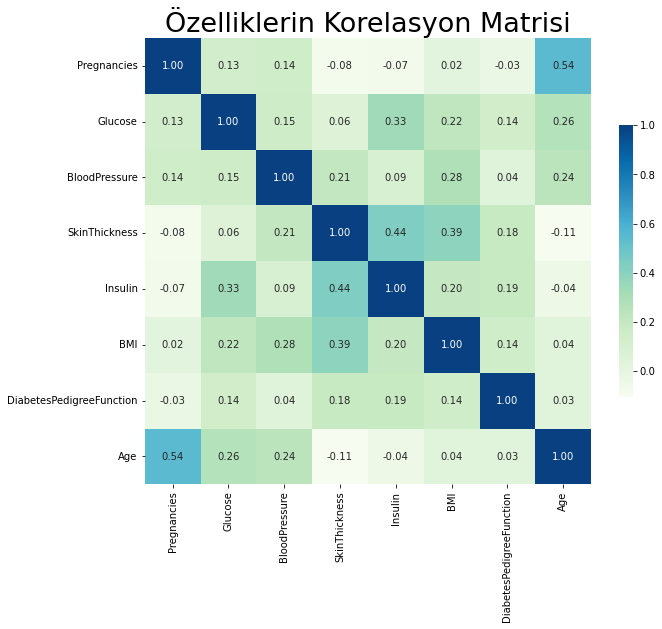

In [11]:

########################## Correlation Analysis #############################################

"""corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()"""

# Insulin - Glucose relationship is above +0.30
# Insulin - Skin Thickness is around +0.43
# BMI - Skin Thickness is nearly +0.40
# Correlation between the other numeric features are
# even lower than these values.
# As a result, I did not find any high correlation (like above %70) variables
# in this dataset.

"""df.corr()"""

# In correlation matrix, I dont think I should compare categoric var. with numerics but,
# when I add pregnancy and the target val to our comparison
# I notice the relationship between age and pregnancy (0.54)
# Also Glucose level and the Outcome result. (nearly 0.5)

correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Özelliklerin Korelasyon Matrisi', fontsize=27)
plt.show()



In [12]:

################################################################################################
# 2. Feature Engineering
################################################################################################

# Handling NaN.

df.isnull().sum()
# As I stated in section 1.0, this dataset does not contain any NaN value. However,
# datasource tells us that some features like Glucose, Insulin cannot have 0 value.
# Therefore, we might need to count them as NAN. Let's check descripteves of the variables again.

df.describe().T

# Glucose
# BloodPressure
# SkinThickness
# Insulin
# BMI :Based on these figures a mean BMI of 12 as the lower limit for human survival emerges - a value first proposed by James et al (1988)
# Thus, for these features, we will count 0 as NaN values. Why not outlier??
# BMI lower than 12 will also be NaN
# 90/60mmHg or less is considered the lowest blood pressure before death.

df[df['BloodPressure']<60]['BloodPressure'].count() #121
df[df['BloodPressure']<60].index
df[df['BMI']<12]['BMI'].count() #11
df[df['BMI']<12]['BMI'].index
df[df['Insulin'] ==0]['Insulin'].count() #374
df[df['Insulin'] ==0]['Insulin'].index
df[df['SkinThickness'] == 0]['SkinThickness'].count() #227
df[df['SkinThickness'] == 0]['SkinThickness'].index
df[(df['BloodPressure']<60) & (df['Insulin'] ==0) & (df['SkinThickness'] == 0)].count() #47

# Lets replace 0's with NaN values first.
df['BloodPressure'].replace(0, np.nan, inplace = True)
df['BMI'].replace(0, np.nan, inplace = True)
df['Insulin'].replace(0, np.nan, inplace = True)
df['SkinThickness'].replace(0, np.nan, inplace = True)
df['Glucose'].replace(0, np.nan, inplace = True)
df.isnull().sum()


missing_values_table(df)
# Almost 50% of the Insulin feature is missing.
# Almost 30% of  the SkinThickness feature is missing.


# The relationship between the missings and the target var.
na_cols = [col for col in df.columns if df[col].isnull().sum() != 0]
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Outcome", na_cols)
# BloodPressure : if NaN -> Target_mean = 0.45. if value -> Target is lower(0.34). 35 NaN.
# SkinThickness : if NaN -> Target_mean = 0.38. if value -> Target is lower(0.33). 227 NaN.
# Insulin       : if NaN -> Target_mean = 0.36. if Value-> Target is lower(0.33). 374 NaN.
# BMI           : if NaN -> Target_mean = 0.18. if value -> 0.35. 11 NaN.


               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650
                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    763
1                      0.400      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.344    733
1                            0.457     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.333    541
1                            0.388    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.330    394
1                      0.369    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.351    757
1                  0.182     11




In [13]:
############################# Filling Missing Values ####################################

#1. SkinThickness:

df.groupby('Outcome').agg({'SkinThickness': 'median'})
# OUT: 0:27 1:32
# I decided to fill skinThickness NaN values with their median value.
# 27 for a healthy person and 32 for a diabetic person
df['SkinThickness'].fillna(df.groupby('Outcome')['SkinThickness'].transform('median'), inplace = True)
#df.loc[(df['SkinThickness'].isnull() & df['Outcome'] == 0), 'SkinThickness'] = 27
#df.loc[(df['SkinThickness'].isnull() & df['Outcome'] == 1), 'SkinThickness'] = 27
df.isnull().sum()

#2. Insulin:

df.groupby('Outcome').agg({'Insulin': 'median'})
# OUT: 0:102.5 1:169.5
# Fill with the median value.
df['Insulin'].fillna(df.groupby('Outcome')['Insulin'].transform('median'),inplace = True)
df.isnull().sum()

#3. BloodPressure:

df['BloodPressure'].fillna(df.groupby('Outcome')['BloodPressure'].transform('median'),inplace = True)
df.isnull().sum()

#4. BloodPressure:

df['BMI'].fillna(df.groupby('Outcome')['BMI'].transform('median'),inplace = True)
df.isnull().sum()


#4. Glucose:

df['Glucose'].fillna(df.groupby('Outcome')['Glucose'].transform('median'),inplace = True)
df.isnull().sum()

# Approach 2: Finding out the bloodpressure value from insulin and glucose???
# df[df['BloodPressure'].isnull()].head(45)
# It seems that when the bloodpressure is NaN, the insulin is also NaN.
# To see the correlations between missing values;
#msno.bar(df)
#plt.show()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:

############################# Generating New Features ####################################

df['NEW_GLUCOSE'] = pd.cut(x = df['Glucose'], bins = [-1,80,140,160,200],
                               labels = ['Hypoglecimia','Normal', 'Prediabetes', 'Diabetic_Glucose']) # 2 hour

df['NEW_AGE'] = pd.cut( x = df['Age'], bins = [18,44,64,100],
                               labels = ['Adults', 'MiddleAged' , 'Senior'])


df['NEW_BLOOD_PRESSURE'] = pd.cut(x = df['BloodPressure'], bins = [0,80,89,120,300],
                               labels = ['Normal', 'High_Blood_Pressure' , 'Hypertension', 'Hypertension_Crisis'])

df['NEW_INSULIN'] = pd.cut(x= df['Insulin'], bins = [0, 120, 1000], labels = ['Normal','Abnormal'])

df['NEW_BMI'] = pd.cut(x = df['BMI'], bins = [0,18,25,29,68], labels = ['Underweight', 'Normal', 'Overweight', 'Obesity'])

df['Pregnancies'].describe()

#df.loc[(df['Pregnancies'] == 0), 'PREGNANT_CAT_NEW']  = 'NO_TIME'
#df.loc[(df['Pregnancies'] == 1), 'PREGNANT_CAT_NEW']  = 'ONE_TIME'
#df.loc[(df['Pregnancies'] > 1), 'PREGNANT_CAT_NEW']   = 'MANY_TIME'


# # Yaş ve beden kitle indeksini bir arada düşünerek kategorik değişken oluşturma 3 kırılım yakalandı
#df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
#df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
#df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
#df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
#df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
#df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
#df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
#df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

# Yaş ve Glikoz değerlerini bir arada düşünerek kategorik değişken oluşturma
#df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
#df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
#df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
#df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
#df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
#df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
#df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
#df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

df["NEW_GLUCOSE_INSULIN"] = df["Glucose"] * df["Insulin"]
df["NEW_BMI_SKINTHICKNESS"] = df["BMI"] * df["SkinThickness"]
df["NEW_BMI_PREGNANCIES"] = df["BMI"] * df["Pregnancies"]
df["NEW_BMI_AGE"] = df["BMI"] * df["Age"]


In [15]:
df['NEW_AGE_PREGNANCY'] = df['Pregnancies']*df['Age']
target_summary_with_num(df, 'Outcome', 'NEW_AGE_PREGNANCY')
df['NEW_AGE_PREGNANCY'].describe()
#df['Age_Numberofpregnancy_CAT'] = pd.cut(x = df['Age_Numberofpregnancy'], bins = [0,125, 170 ,800])
#df.groupby('Age_Numberofpregnancy_CAT').agg({'Outcome': ['mean', 'sum']}).reset_index().\
    #sort_values(by = ('Outcome','sum'),ascending = False)

df.head()


         NEW_AGE_PREGNANCY
Outcome                   
0                  122.988
1                  198.549


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_GLUCOSE,NEW_AGE,NEW_BLOOD_PRESSURE,NEW_INSULIN,NEW_BMI,NEW_GLUCOSE_INSULIN,NEW_BMI_SKINTHICKNESS,NEW_BMI_PREGNANCIES,NEW_BMI_AGE,NEW_AGE_PREGNANCY
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,Prediabetes,MiddleAged,Normal,Abnormal,Obesity,25086.000,1176.000,201.600,1680.000,300
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,Normal,Adults,Normal,Normal,Overweight,8712.500,771.400,26.600,824.600,31
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,Diabetic_Glucose,Adults,Normal,Abnormal,Normal,31018.500,745.600,186.400,745.600,256
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,Normal,Adults,Normal,Normal,Overweight,8366.000,646.300,28.100,590.100,21
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,Normal,Adults,Normal,Abnormal,Obesity,23016.000,1508.500,0.000,1422.300,0


In [16]:
############################# Handling Outliers ####################################

cat_cols, num_cols, cat_but_car = grab_col_names (df, categorical = 10, cardinal =20)

num_cols

grab_outliers(df, 'Glucose', True) #
grab_outliers(df, 'BloodPressure',True) #
grab_outliers(df, 'Insulin',True)#18
grab_outliers(df, 'BMI',True) #0
grab_outliers(df, 'DiabetesPedigreeFunction',True) #4
grab_outliers(df, 'Age',True)#0
grab_outliers(df, 'NEW_AGE_PREGNANCY',True) # 0

x= 18/df.shape[0]

df.shape
replace_with_thresholds(df, 'Insulin')
replace_with_thresholds(df, 'DiabetesPedigreeFunction')
df.shape

Observations: 768
Variables: 19
cat_cols: 6
num_cols: 13
cat_but_car: 0
num_but_cat: 6
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome, NEW_GLUCOSE, NEW_AGE, NEW_BLOOD_PRESSURE, NEW_INSULIN, NEW_BMI, NEW_GLUCOSE_INSULIN, NEW_BMI_SKINTHICKNESS, NEW_BMI_PREGNANCIES, NEW_BMI_AGE, NEW_AGE_PREGNANCY]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome, NEW_GLUCOSE, NEW_AGE, NEW_BLOOD_PRESSURE, NEW_INSULIN, NEW_BMI, NEW_GLUCOSE_INSULIN, NEW_BMI_SKINTHICKNESS, NEW_BMI_PREGNANCIES, NEW_BMI_AGE, NEW_AGE_PREGNANCY]
Index: []
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome       NEW_GLUCOSE     NEW_AGE   NEW_BLOOD_PRESSURE NEW_INSULIN  NEW_BMI  NEW_GLUCOSE_INSULIN  NEW_BMI_SKINTHICKNESS  NEW_BMI_PREGNANCIES  NEW_BMI_AGE  NEW_AGE_PREGNANCY
8              2  197.000 

(768, 19)

In [17]:
df = df.copy()


In [18]:
############################# Encoding ####################################

# Değişkenlerin tiplerine göre ayrılması işlemi
cat_cols, num_cols, cat_but_car = grab_col_names(df)


def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

# One-Hot Encoding İşlemi
# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Outcome"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

Observations: 768
Variables: 19
cat_cols: 6
num_cols: 13
cat_but_car: 0
num_but_cat: 6


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_GLUCOSE_INSULIN,NEW_BMI_SKINTHICKNESS,NEW_BMI_PREGNANCIES,NEW_BMI_AGE,NEW_AGE_PREGNANCY,NEW_GLUCOSE_Normal,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetic_Glucose,NEW_AGE_MiddleAged,NEW_AGE_Senior,NEW_BLOOD_PRESSURE_High_Blood_Pressure,NEW_BLOOD_PRESSURE_Hypertension,NEW_BLOOD_PRESSURE_Hypertension_Crisis,NEW_INSULIN_Abnormal,NEW_BMI_Normal,NEW_BMI_Overweight,NEW_BMI_Obesity
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,25086.000,1176.000,201.600,1680.000,300,0,1,0,1,0,0,0,0,1,0,0,1
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,8712.500,771.400,26.600,824.600,31,1,0,0,0,0,0,0,0,0,0,1,0
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,31018.500,745.600,186.400,745.600,256,0,0,1,0,0,0,0,0,1,1,0,0
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,8366.000,646.300,28.100,590.100,21,1,0,0,0,0,0,0,0,0,0,1,0
4,0,137.000,40.000,35.000,168.000,43.100,1.949,33,1,23016.000,1508.500,0.000,1422.300,0,1,0,0,0,0,0,0,0,1,0,0,1


In [19]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NEW_GLUCOSE_INSULIN', 'NEW_BMI_SKINTHICKNESS', 'NEW_BMI_PREGNANCIES', 'NEW_BMI_AGE', 'NEW_AGE_PREGNANCY', 'NEW_GLUCOSE_Normal', 'NEW_GLUCOSE_Prediabetes', 'NEW_GLUCOSE_Diabetic_Glucose', 'NEW_AGE_MiddleAged', 'NEW_AGE_Senior', 'NEW_BLOOD_PRESSURE_High_Blood_Pressure', 'NEW_BLOOD_PRESSURE_Hypertension', 'NEW_BLOOD_PRESSURE_Hypertension_Crisis',
       'NEW_INSULIN_Abnormal', 'NEW_BMI_Normal', 'NEW_BMI_Overweight', 'NEW_BMI_Obesity'],
      dtype='object')

In [21]:
df.drop(['NEW_GLUCOSE_Normal', 'NEW_GLUCOSE_Prediabetes', 'NEW_GLUCOSE_Diabetic_Glucose', 'NEW_AGE_MiddleAged', 'NEW_AGE_Senior', 'NEW_BLOOD_PRESSURE_High_Blood_Pressure', 'NEW_BLOOD_PRESSURE_Hypertension', 'NEW_BLOOD_PRESSURE_Hypertension_Crisis',
       'NEW_INSULIN_Abnormal', 'NEW_BMI_Normal', 'NEW_BMI_Overweight', 'NEW_BMI_Obesity'] , axis = 1, inplace = True)

In [22]:

############################# Modelling ####################################
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_train = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [23]:
############################# Modelling ####################################
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_scaled = norm.fit_transform(X)
X_train = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


### SVC

In [951]:
svc_params = {'C': [100],  'kernel': ['rbf']}


# classifiers = [('LightGBM', LGBMClassifier(random_state=46), lightgbm_params)]
classifiers = [('SVC', SVC(random_state=46,probability=True), svc_params)]
#classifiers = [('MLP', MLPClassifier(random_state=46), mlp_params)]


In [952]:
def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        """cv_results = cross_validate(classifier, X_train, y_train, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")"""

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X_train, y_train)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model

        y_pred = final_model.fit(X, y).predict(X_test)
        print(f"classification report: {classification_report(y_test, y_pred)}")
        print(f"confusion matrix: {confusion_matrix(y_test, y_pred)}")

        """print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
        print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
        print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
        print(f"F1: {round(f1_score(y_pred,y_test), 2)}")"""
        #print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
    return best_models

best_models = hyperparameter_optimization(X_train, y_train)

Hyperparameter Optimization....
########## SVC ##########


In [947]:
best_models

{'SVC': SVC(C=100, probability=True, random_state=46)}

In [948]:
svm_model = best_models["SVC"]

In [949]:
# svm roc curve ve auc değeri
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, X, y, save=False):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.figure(figsize=(10, 10))
    plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score, color='turquoise', lw=3)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    if save:
        plt.savefig('roc_curve.png')

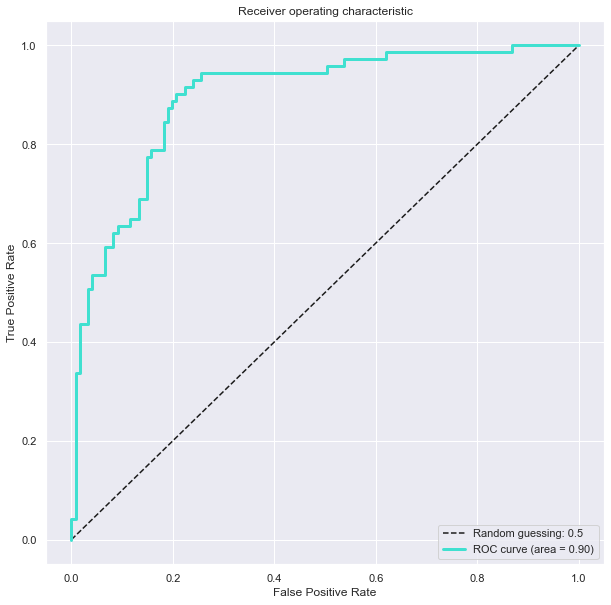

In [950]:
plot_roc_curve(svm_model, X_test, y_test)

### LGBM

In [27]:
lightgbm_params = {"learning_rate": [0.01],
                "n_estimators": [250,270,280,290]

classifiers = [('LightGBM', LGBMClassifier(random_state=46), lightgbm_params)]

In [921]:
def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        """cv_results = cross_validate(classifier, X_train, y_train, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")"""

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X_train, y_train)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model

        y_pred = final_model.fit(X, y).predict(X_test)
        print(f"classification report: {classification_report(y_test, y_pred)}")
        print(f"confusion matrix: {confusion_matrix(y_test, y_pred)}")

        """print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
        print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
        print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
        print(f"F1: {round(f1_score(y_pred,y_test), 2)}")"""
        #print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
    return best_models

best_models = hyperparameter_optimization(X_train, y_train)

Hyperparameter Optimization....
########## LightGBM ##########
accuracy (After): 0.8925
LightGBM best params: {'learning_rate': 0.01, 'n_estimators': 250}

classification report:               precision    recall  f1-score   support

           0       0.90      0.95      0.92       121
           1       0.91      0.82      0.86        71

    accuracy                           0.90       192
   macro avg       0.90      0.88      0.89       192
weighted avg       0.90      0.90      0.90       192

confusion matrix: [[115   6]
 [ 13  58]]


In [922]:
# lgbm importance
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

# lgbm roc curve ve auc değeri
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, X, y, save=False):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.figure(figsize=(10, 10))
    plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score, color='turquoise', lw=3)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right", fontsize=13)
    plt.show()
    if save:
        plt.savefig('roc_curve.png')

In [923]:
best_models
lgbm_model = best_models["LightGBM"]

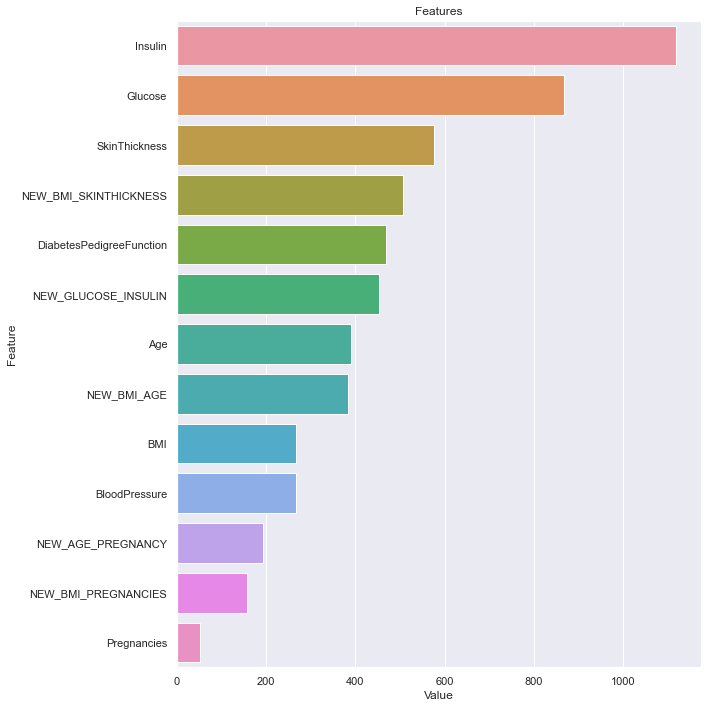

In [924]:
plot_importance(lgbm_model, X_train)

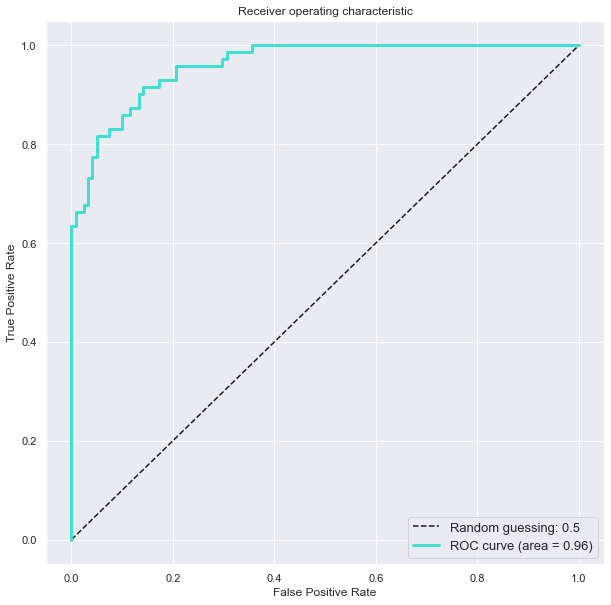

In [925]:
plot_roc_curve(lgbm_model, X_test, y_test)

### YSA

In [24]:
df.shape

(768, 14)

In [25]:
X_train.shape, X_test.shape

((614, 13), (154, 13))

In [26]:
import tensorflow as tf
from keras.optimizers import Adam

In [110]:
tf.random.set_seed(3)
opt = Adam(learning_rate=0.01)
model = tf.keras.Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(20, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')        
])
model.compile(loss= 'binary_crossentropy' , optimizer= opt , metrics=[ 'accuracy' ])

In [111]:
history= model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=64,verbose=0, shuffle=True, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

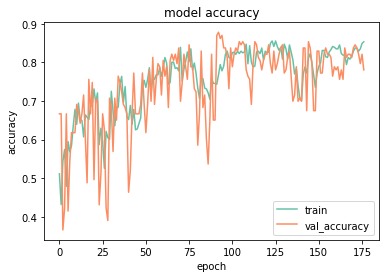

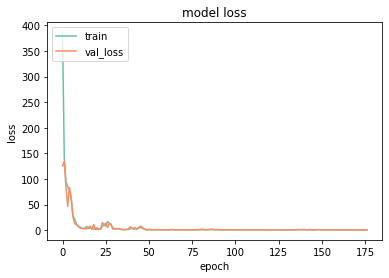

In [112]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history[ 'accuracy'])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'val_accuracy' ], loc= 'lower right' )
plt.show()

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'val_loss' ], loc= 'upper left' )

In [82]:
print(classification_report(y_test, y_predd))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73        97
           1       0.58      0.91      0.71        57

    accuracy                           0.72       154
   macro avg       0.75      0.76      0.72       154
weighted avg       0.79      0.72      0.72       154



In [83]:
y_predd = model.predict(X_test)
y_predd = (y_predd > 0.2)
accuracy_score(y_test,y_predd)

5/5 [==============================] - 0s 1ms/step


0.7207792207792207

In [908]:
print(confusion_matrix(y_test, y_predd))

[[106  15]
 [ 11  60]]


In [910]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

6/6 [==============================] - 0s 997us/step


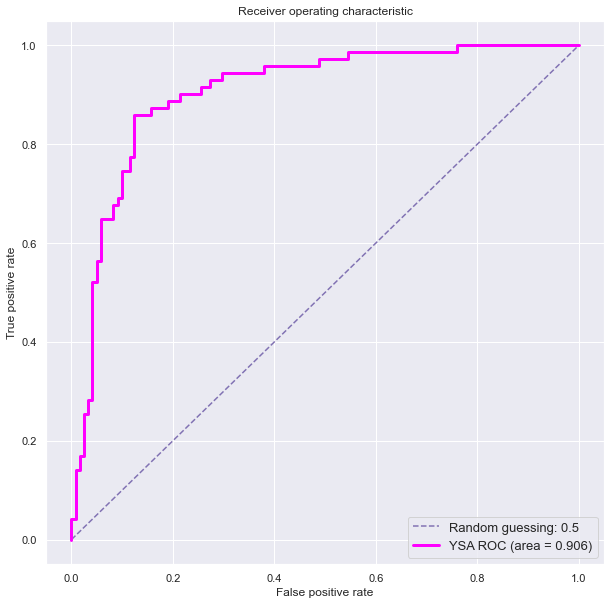

In [919]:
plt.figure(figsize=(10, 10))
plt.plot([0,1], [0,1], 'm--', label = 'Random guessing: 0.5')
plt.plot(fpr_keras, tpr_keras, label='YSA ROC (area = {:.3f})'.format(auc_keras), color='magenta',lw = 3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", fontsize=13)
plt.show()